# Ground water level prediction
## Md. Abdullah-Al Mamun
## Mst Nazneen Aktar


# Exploratory data analysis

In [11]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
rainfall_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_Rainfall_Three_locations.xlsx')  # Specify the header row number
rainfall_df


,Year,Month,PRCP_Rangpur,PRCP_Sayedpur,PRCP_Dinajpur
0,1993,1,49,38,42
1,1993,2,0,0,0
2,1993,3,30,45,29
3,1993,4,62,58,82
4,1993,5,190,201,308
...,...,...,...,...,...
295,2017,8,784,603,640
296,2017,9,321,165,210
297,2017,10,0,246,0
298,2017,11,2,1,1


In [13]:
info = GWL_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           300 non-null    int64
 1   Month          300 non-null    int64
 2   PRCP_Rangpur   300 non-null    int64
 3   PRCP_Sayedpur  300 non-null    int64
 4   PRCP_Dinajpur  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [14]:
description_data = round(GWL_df.iloc[:, 2:].describe(), 2)
description_data

,PRCP_Rangpur,PRCP_Sayedpur,PRCP_Dinajpur
count,300.00,300.00,300.00
mean,184.67,177.73,161.96
std,207.52,211.66,193.71
min,0.00,0.00,0.00
25%,4.00,4.00,3.00
50%,109.50,80.50,71.00
75%,333.00,297.00,283.50
max,913.00,951.00,1026.00


In [15]:
# Checking the missing values in each coulmn
missing_values = GWL_df.isnull().sum()
missing_values

Year             0
Month            0
PRCP_Rangpur     0
PRCP_Sayedpur    0
PRCP_Dinajpur    0
dtype: int64

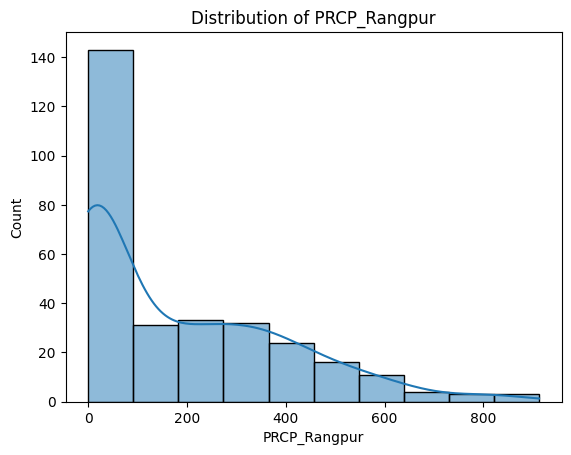

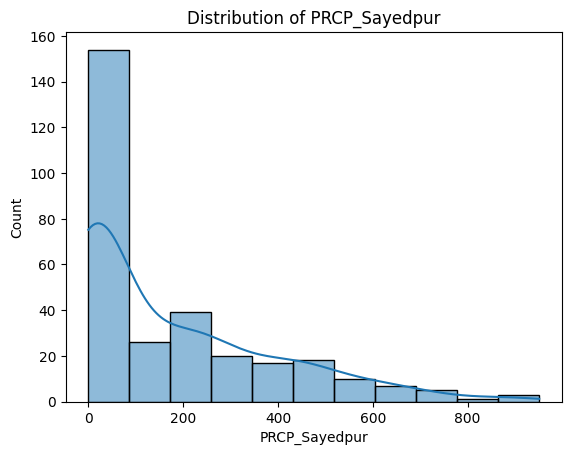

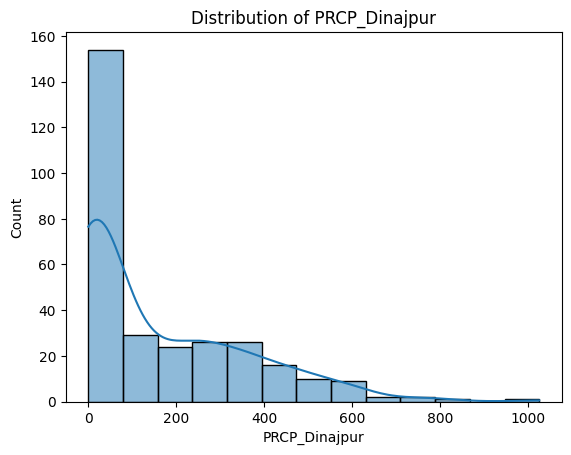

In [16]:
def plot_distribution(GWL_df):
    for column in GWL_df.columns:
        sns.histplot(GWL_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(GWL_df.iloc[:, 2:])

In [17]:
correlation_matrix = GWL_df.corr()
correlation_matrix

,Year,Month,PRCP_Rangpur,PRCP_Sayedpur,PRCP_Dinajpur
Year,1.000000e+00,4.492787e-15,-0.015346,-0.054021,-0.058328
Month,4.492787e-15,1.000000e+00,0.139841,0.153863,0.168883
PRCP_Rangpur,-1.534642e-02,1.398408e-01,1.000000,0.904438,0.899775
PRCP_Sayedpur,-5.402057e-02,1.538633e-01,0.904438,1.000000,0.910251
PRCP_Dinajpur,-5.832846e-02,1.688827e-01,0.899775,0.910251,1.000000


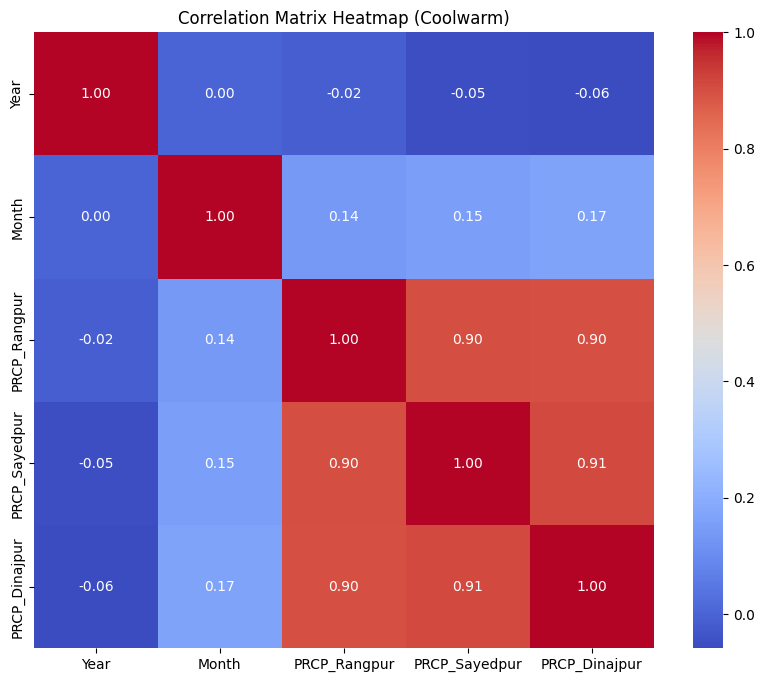

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming GWL_df is your DataFrame
correlation_matrix = GWL_df.corr()

# Create a heatmap with the "coolwarm" color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Coolwarm)")
plt.show()


D:\Jupyter\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


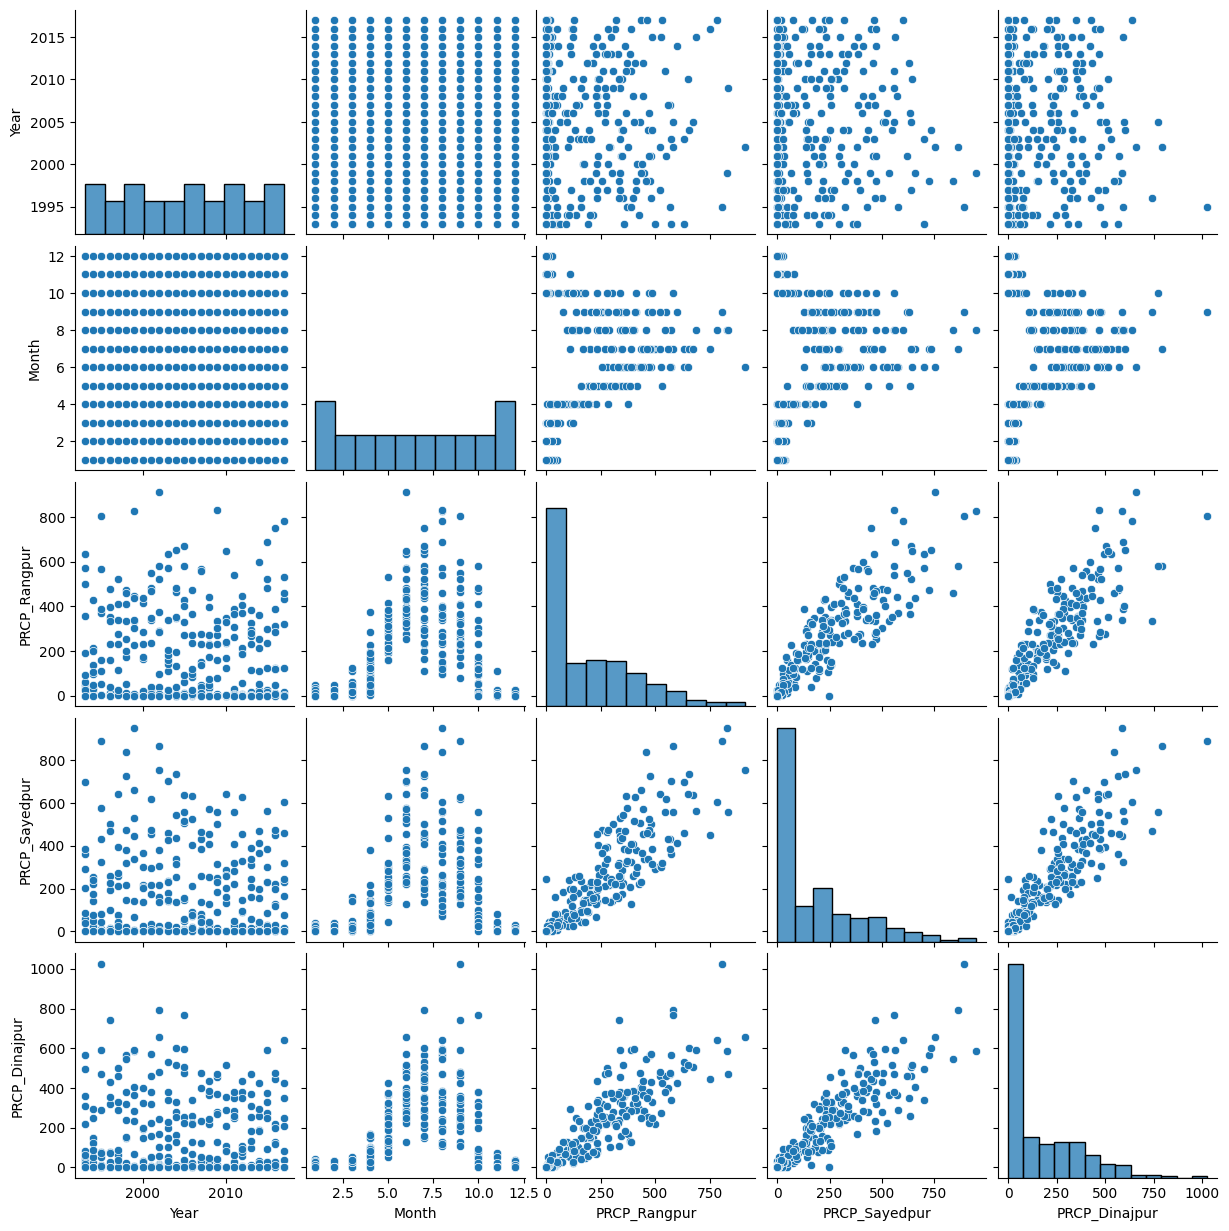

In [19]:
sns.pairplot(GWL_df)
plt.show()

In [20]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(GWL_df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [21]:
checker.check_missing_values()

No missing values found in DataFrame


In [22]:
def plot_boxplot_with_outliers(data):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    bp = plt.boxplot(data[numeric_columns].values, showfliers=False)
    plt.title('Boxplot')
    plt.ylabel('Values')

    for j, column in enumerate(numeric_columns, 1):
        column_values = data[column].values
        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(j, outlier, 'ro', label='Outlier')

    plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation='vertical')  
    plt.tight_layout() 
    plt.show()


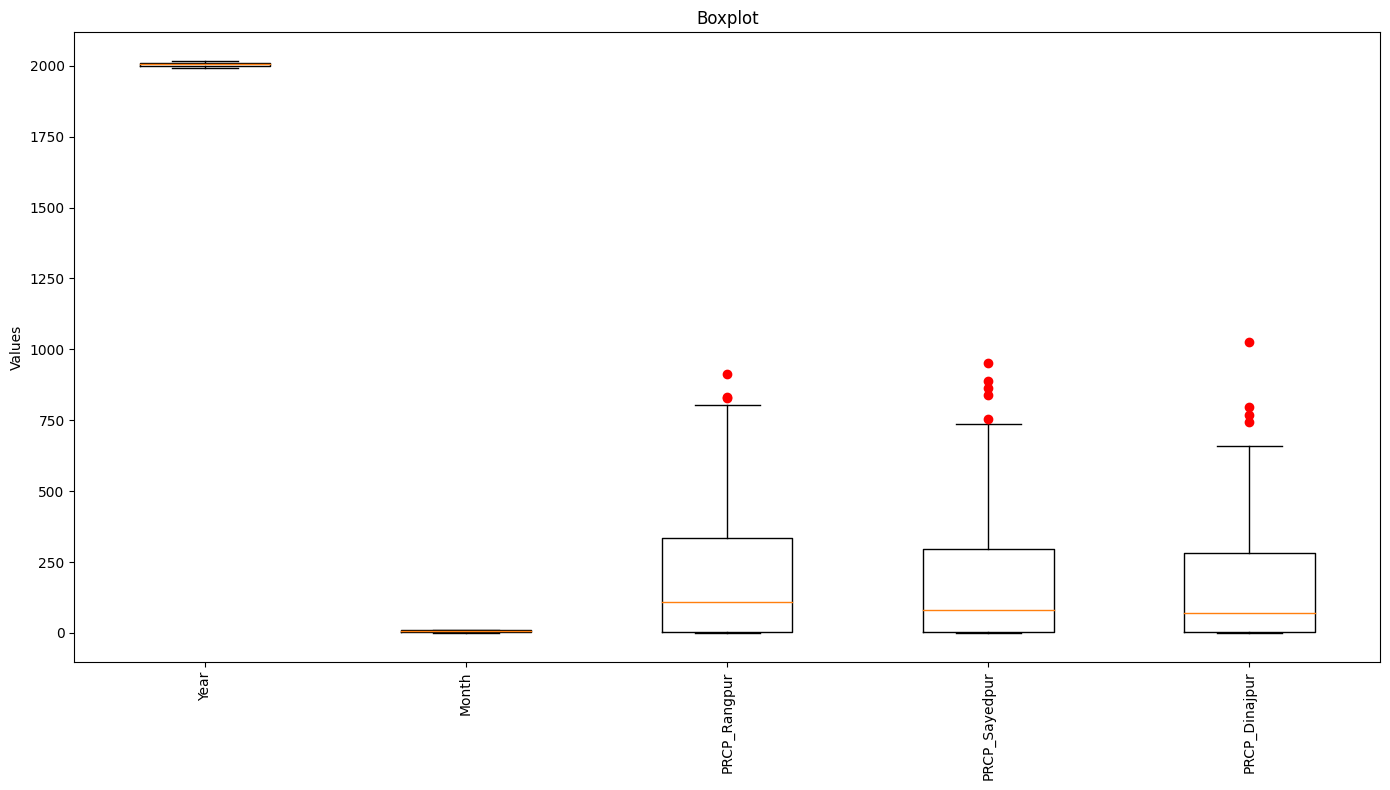

In [23]:
plot_boxplot_with_outliers(GWL_df)

In [24]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers


In [25]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


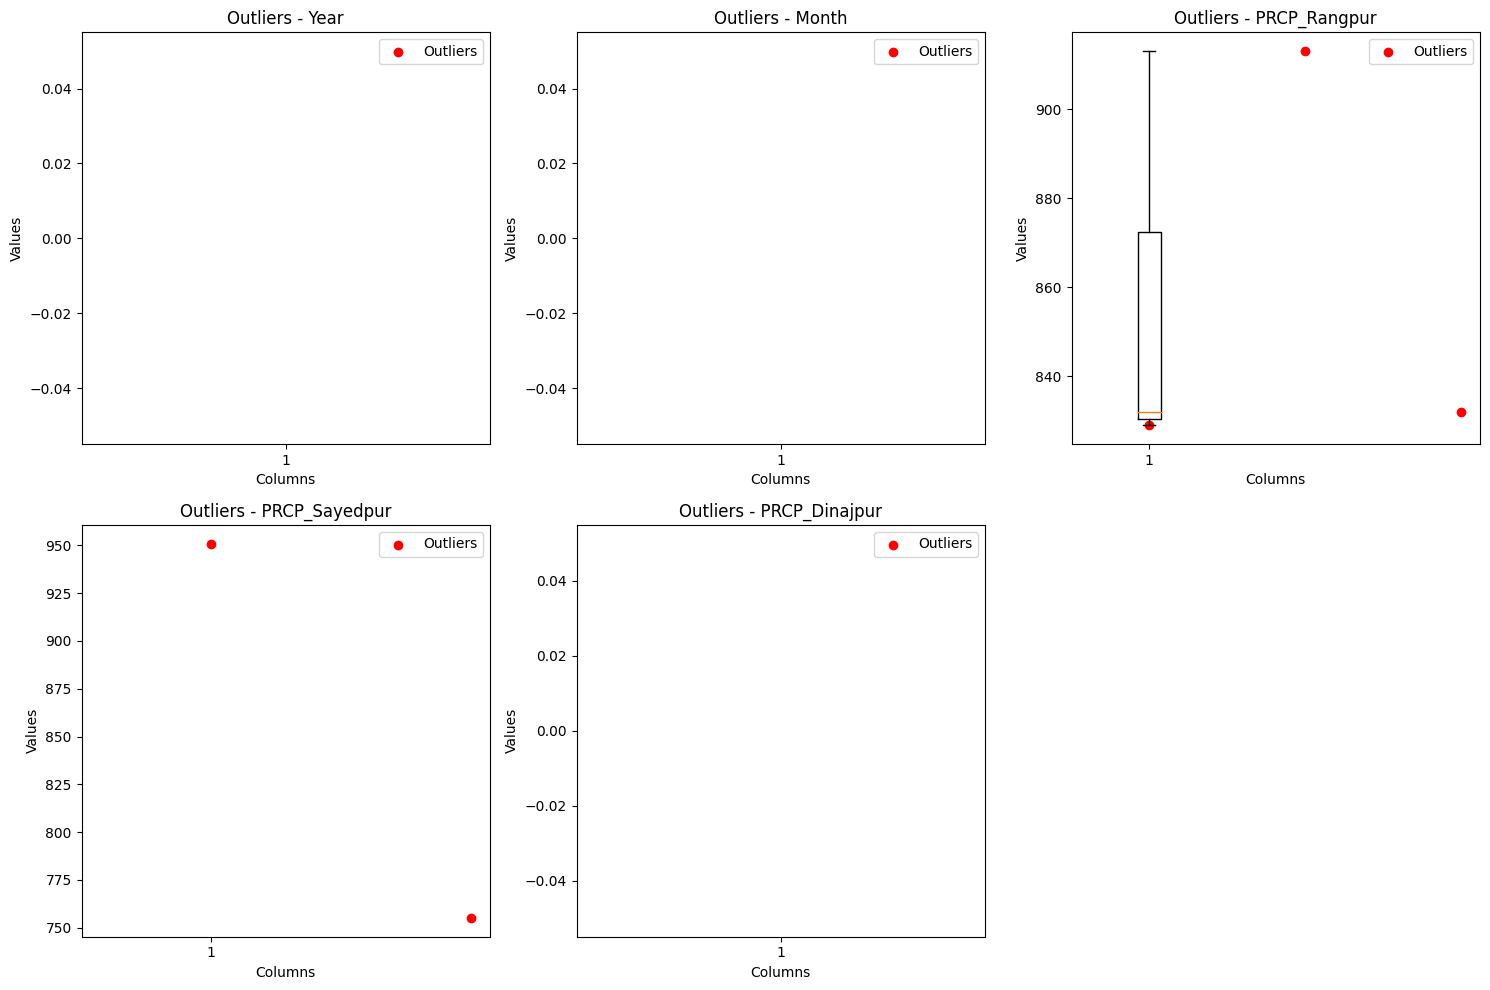

Number of total outliers: 12


In [26]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = GWL_df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = GWL_df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

In [27]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(GWL_df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: PRCP_Rangpur
Transformation recommended for column: PRCP_Sayedpur
Transformation recommended for column: PRCP_Dinajpur
